# Import

In [ ]:
!pip install --ignore-installed librosa

  Using cached librosa-0.10.1-py3-none-any.whl (253 kB)
  Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
  Using cached numpy-1.26.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached scipy-1.11.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Using cached scikit_learn-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
  Using cached numba-0.58.1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.6 MB)
  Using cached soundfile-0.12.1-py2.py3-none-manylinux_2_31_x86_64.whl (1.2 MB)
  Using cached pooch-1.8.0-py3-none-any.whl (62 kB)
  Using cached soxr-0.3.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
  Using cached msgpack-1.0.7-cp310-cp

In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Y dataset 행 표준화

In [ ]:
import pandas as pd

In [ ]:
'''
이런 식으로 Y dataset 만들었습니다
import cv2
import dlib
import pandas as pd

# Dlib의 얼굴 검출기와 랜드마크 예측기 초기화
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# 동영상 파일 불러오기
video_path = "/content/gdrive//MyDrive/Wav2Lip/mp4/lip_J_2_M_05_C221_A_003_1.mp4"
video_capture = cv2.VideoCapture(video_path)

# 총 프레임 수 확인
total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))


# 데이터프레임 초기화
columns = [f"Landmark_{i}_{j}" for i in range(1, 21) for j in ["X", "Y"]]
df03 = pd.DataFrame(columns=columns)

# 현재 프레임 초기화
current_frame = 0

while current_frame < total_frames:
    # 현재 프레임에서 1000개의 프레임 수집
    for i in range(total_frames):
        ret, frame = video_capture.read()
        if not ret:
            break

        # 얼굴 검출
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = detector(gray)

        for face in faces:
            # 얼굴에서 랜드마크(특징점) 찾기
            landmarks = predictor(gray, face)

            # 입술 좌표 추출 (랜드마크 48-68은 입술에 해당)
            lips_points = landmarks.parts()[48:68]

            # 좌표를 리스트에 추가
            coordinates = [point.x for point in lips_points] + [point.y for point in lips_points]
            df03 = df03.append(pd.Series(coordinates, index=df02.columns), ignore_index=True)

        current_frame += 1

# 사용이 끝난 객체들을 해제
video_capture.release()

# 데이터프레임 확인
#print(df.head())
'''

<ipython-input-33-41ef5f42c9d5>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df03 = df03.append(pd.Series(coordinates, index=df02.columns), ignore_index=True)
<ipython-input-33-41ef5f42c9d5>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df03 = df03.append(pd.Series(coordinates, index=df02.columns), ignore_index=True)
<ipython-input-33-41ef5f42c9d5>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df03 = df03.append(pd.Series(coordinates, index=df02.columns), ignore_index=True)
<ipython-input-33-41ef5f42c9d5>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df03 = df03.append(pd.Series(coordinates, index=df02.columns), ignore_

In [ ]:
df1 = pd.read_csv("/content/gdrive//MyDrive/Wav2Lip/csv/lip_J_1_F_02_C032_A_010.csv",index_col=0)
# x 좌표와 y 좌표 구분
x_cols = df1.iloc[:, :20]  # x 열
y_cols = df1.iloc[:, 20:]  # y 열

x_cols['mean_x']=x_cols.mean(axis=1)
x_cols['std_x']=x_cols.std(axis=1)
df1.iloc[:, :20]=(x_cols.iloc[:, :20].sub(x_cols['mean_x'],axis=0)).div(x_cols['std_x'],axis=0)

y_cols['mean_y']=y_cols.mean(axis=1)
y_cols['std_y']=y_cols.std(axis=1)
df1.iloc[:, 20:]=(y_cols.iloc[:, :20].sub(y_cols['mean_y'],axis=0)).div(y_cols['std_y'],axis=0)

<ipython-input-4-d0681a3bf214>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cols['mean_x']=x_cols.mean(axis=1)
<ipython-input-4-d0681a3bf214>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cols['std_x']=x_cols.std(axis=1)
<ipython-input-4-d0681a3bf214>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
df2 = pd.read_csv("/content/gdrive//MyDrive/Wav2Lip/csv/lip_J_1_F_02_C032_A_011.csv",index_col=0)
# x 좌표와 y 좌표 구분
x_cols = df2.iloc[:, :20]  # x 열
y_cols = df2.iloc[:, 20:]  # y 열

x_cols['mean_x']=x_cols.mean(axis=1)
x_cols['std_x']=x_cols.std(axis=1)
df2.iloc[:, :20]=(x_cols.iloc[:, :20].sub(x_cols['mean_x'],axis=0)).div(x_cols['std_x'],axis=0)

y_cols['mean_y']=y_cols.mean(axis=1)
y_cols['std_y']=y_cols.std(axis=1)
df2.iloc[:, 20:]=(y_cols.iloc[:, :20].sub(y_cols['mean_y'],axis=0)).div(y_cols['std_y'],axis=0)

<ipython-input-5-bd55252f8f7f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cols['mean_x']=x_cols.mean(axis=1)
<ipython-input-5-bd55252f8f7f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cols['std_x']=x_cols.std(axis=1)
<ipython-input-5-bd55252f8f7f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
df3 = pd.read_csv("/content/gdrive//MyDrive/Wav2Lip/csv/lip_J_2_M_05_C221_A_002.csv",index_col=0)
# x 좌표와 y 좌표 구분
x_cols = df3.iloc[:, :20]  # x 열
y_cols = df3.iloc[:, 20:]  # y 열

x_cols['mean_x']=x_cols.mean(axis=1)
x_cols['std_x']=x_cols.std(axis=1)
df3.iloc[:, :20]=(x_cols.iloc[:, :20].sub(x_cols['mean_x'],axis=0)).div(x_cols['std_x'],axis=0)

y_cols['mean_y']=y_cols.mean(axis=1)
y_cols['std_y']=y_cols.std(axis=1)
df3.iloc[:, 20:]=(y_cols.iloc[:, :20].sub(y_cols['mean_y'],axis=0)).div(y_cols['std_y'],axis=0)

<ipython-input-6-b4fe0a21b5a3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cols['mean_x']=x_cols.mean(axis=1)
<ipython-input-6-b4fe0a21b5a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cols['std_x']=x_cols.std(axis=1)
<ipython-input-6-b4fe0a21b5a3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
df4 = pd.read_csv("/content/gdrive//MyDrive/Wav2Lip/csv/lip_J_2_M_05_C221_A_003.csv",index_col=0)
# x 좌표와 y 좌표 구분
x_cols = df4.iloc[:, :20]  # x 열
y_cols = df4.iloc[:, 20:]  # y 열

x_cols['mean_x']=x_cols.mean(axis=1)
x_cols['std_x']=x_cols.std(axis=1)
df4.iloc[:, :20]=(x_cols.iloc[:, :20].sub(x_cols['mean_x'],axis=0)).div(x_cols['std_x'],axis=0)

y_cols['mean_y']=y_cols.mean(axis=1)
y_cols['std_y']=y_cols.std(axis=1)
df4.iloc[:, 20:]=(y_cols.iloc[:, :20].sub(y_cols['mean_y'],axis=0)).div(y_cols['std_y'],axis=0)

<ipython-input-7-c23fcc85a4e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cols['mean_x']=x_cols.mean(axis=1)
<ipython-input-7-c23fcc85a4e4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cols['std_x']=x_cols.std(axis=1)
<ipython-input-7-c23fcc85a4e4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
Y=np.concatenate([df1,df2,df3,df4], axis=0)

In [ ]:
Y.shape

(36523, 40)

# X dataset 만들기

wav -> mfcc

In [ ]:
file1 = "/content/gdrive//MyDrive/Wav2Lip/wav/lip_J_1_F_02_C032_A_010.wav"
file2 = "/content/gdrive//MyDrive/Wav2Lip/wav/lip_J_1_F_02_C032_A_011.wav"
file3 = "/content/gdrive//MyDrive/Wav2Lip/wav/lip_J_2_M_05_C221_A_002.wav"
file4 = "/content/gdrive//MyDrive/Wav2Lip/wav/lip_J_2_M_05_C221_A_003.wav"

In [ ]:
# load audio file with Librosa
sig1, sr1 = librosa.load(file1, sr=16000)    # 16,000 Hz는 음성 신호에 대한 효과적인 표현을 제공하는 일반적인 값
sig2, sr2 = librosa.load(file2, sr=16000)
sig3, sr3 = librosa.load(file3, sr=16000)
sig4, sr4 = librosa.load(file4, sr=16000)

In [ ]:
# WAV 파일 읽기
y, sr = librosa.load(file1)

# MFCCs 추출
n_mfcc = 20  # MFCCs의 차원 수
n_fft = 2048  # FFT 크기
hop_length = 512  # 프레임 이동 간격

# MFCCs 추출
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

# 원하는 행의 개수를 지정
num_rows = df1.shape[0]

# MFCCs 데이터를 2차원 행렬로 변환
mfcc_matrix1 = np.empty((0, n_mfcc))

# MFCCs 데이터를 행 단위로 추가
for i in range(num_rows):
    start_frame = i * (mfccs.shape[1] // num_rows)
    end_frame = (i + 1) * (mfccs.shape[1] // num_rows)
    mfcc_sequence = mfccs[:, start_frame:end_frame]
    mfcc_matrix1 = np.vstack((mfcc_matrix1, mfcc_sequence.T))  # .T를 통해 전치하여 (n_mfcc, 프레임 수) 형태로

# 결과 확인
print("2D 행렬의 형태:", mfcc_matrix1.shape)  # (9129, n_mfcc)

2D 행렬의 형태: (9128, 20)


In [ ]:
# WAV 파일 읽기
y, sr = librosa.load(file2)

# MFCCs 추출
n_mfcc = 20  # MFCCs의 차원 수
n_fft = 2048  # FFT 크기
hop_length = 512  # 프레임 이동 간격

# MFCCs 추출
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

# 원하는 행의 개수를 지정
num_rows = df2.shape[0]

# MFCCs 데이터를 2차원 행렬로 변환
mfcc_matrix2 = np.empty((0, n_mfcc))

# MFCCs 데이터를 행 단위로 추가
for i in range(num_rows):
    start_frame = i * (mfccs.shape[1] // num_rows)
    end_frame = (i + 1) * (mfccs.shape[1] // num_rows)
    mfcc_sequence = mfccs[:, start_frame:end_frame]
    mfcc_matrix2 = np.vstack((mfcc_matrix2, mfcc_sequence.T))  # .T를 통해 전치하여 (n_mfcc, 프레임 수) 형태로

# 결과 확인
print("2D 행렬의 형태:", mfcc_matrix2.shape)

2D 행렬의 형태: (9195, 20)


In [ ]:
# WAV 파일 읽기
y, sr = librosa.load(file3)

# MFCCs 추출
n_mfcc = 20  # MFCCs의 차원 수
n_fft = 2048  # FFT 크기
hop_length = 512  # 프레임 이동 간격

# MFCCs 추출
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

# 원하는 행의 개수를 지정
num_rows = df3.shape[0]

# MFCCs 데이터를 2차원 행렬로 변환
mfcc_matrix3 = np.empty((0, n_mfcc))

# MFCCs 데이터를 행 단위로 추가
for i in range(num_rows):
    start_frame = i * (mfccs.shape[1] // num_rows)
    end_frame = (i + 1) * (mfccs.shape[1] // num_rows)
    mfcc_sequence = mfccs[:, start_frame:end_frame]
    mfcc_matrix3 = np.vstack((mfcc_matrix3, mfcc_sequence.T))  # .T를 통해 전치하여 (n_mfcc, 프레임 수) 형태로

# 결과 확인
print("2D 행렬의 형태:", mfcc_matrix3.shape)

2D 행렬의 형태: (9098, 20)


In [ ]:
# WAV 파일 읽기
y, sr = librosa.load(file4)

# MFCCs 추출
n_mfcc = 20  # MFCCs의 차원 수
n_fft = 2048  # FFT 크기
hop_length = 512  # 프레임 이동 간격

# MFCCs 추출
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

# 원하는 행의 개수를 지정
num_rows = df4.shape[0]

# MFCCs 데이터를 2차원 행렬로 변환
mfcc_matrix4 = np.empty((0, n_mfcc))

# MFCCs 데이터를 행 단위로 추가
for i in range(num_rows):
    start_frame = i * (mfccs.shape[1] // num_rows)
    end_frame = (i + 1) * (mfccs.shape[1] // num_rows)
    mfcc_sequence = mfccs[:, start_frame:end_frame]
    mfcc_matrix4 = np.vstack((mfcc_matrix4, mfcc_sequence.T))  # .T를 통해 전치하여 (n_mfcc, 프레임 수) 형태로

# 결과 확인
print("2D 행렬의 형태:", mfcc_matrix4.shape)

2D 행렬의 형태: (9102, 20)


In [ ]:
X=np.concatenate([mfcc_matrix1,mfcc_matrix2,mfcc_matrix3,mfcc_matrix4], axis=0)

In [ ]:
X.shape

(36523, 20)

# 모델 학습

In [ ]:
import tensorflow

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM
from sklearn.metrics import r2_score

# 데이터를 훈련 세트와 테스트 세트로 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape input data for LSTM layer
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 모델 생성
model = Sequential()

# LSTM Layer
model.add(LSTM(32, input_shape=(X_train.shape[1], 1), activation='relu'))

# Fully Connected (FC) Layer
model.add(Dense(20, activation='relu'))

# Output Layer
model.add(Dense(40))  # 출력 레이어의 노드 수는 출력의 차원과 일치

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])


In [ ]:
# 모델 훈련
history=model.fit(X_train_reshaped, Y_train, batch_size=64, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
366/366 [==============================] - 12s 25ms/step - loss: 5.6045 - mse: 5.6045 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 2/100
366/366 [==============================] - 10s 28ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 3/100
366/366 [==============================] - 11s 31ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0133 - val_mse: 0.0133
Epoch 4/100
366/366 [==============================] - 9s 26ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 5/100
366/366 [==============================] - 12s 32ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 6/100
366/366 [==============================] - 8s 23ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 7/100
366/366 [==============================] - 9s 26ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 8/100
366/366 [==============================] - 7s 

In [ ]:
# loss function
def plot_history_curve(total_epoch=100,start=1) :
    # package for visualization
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_theme(color_codes=True)

    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.plot(range(start,total_epoch+1),history.history['loss'][start-1:total_epoch],label="Train")
    plt.plot(range(start,total_epoch+1),history.history['val_loss'][start-1:total_epoch],label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("loss")
    plt.legend()


# mse function

    # package for visualization
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set_theme(color_codes=True)

    plt.subplot(1,2,2)
    plt.plot(range(start,total_epoch+1),history.history['mse'][start-1:total_epoch],label="Train")
    plt.plot(range(start,total_epoch+1),history.history['val_mse'][start-1:total_epoch],label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

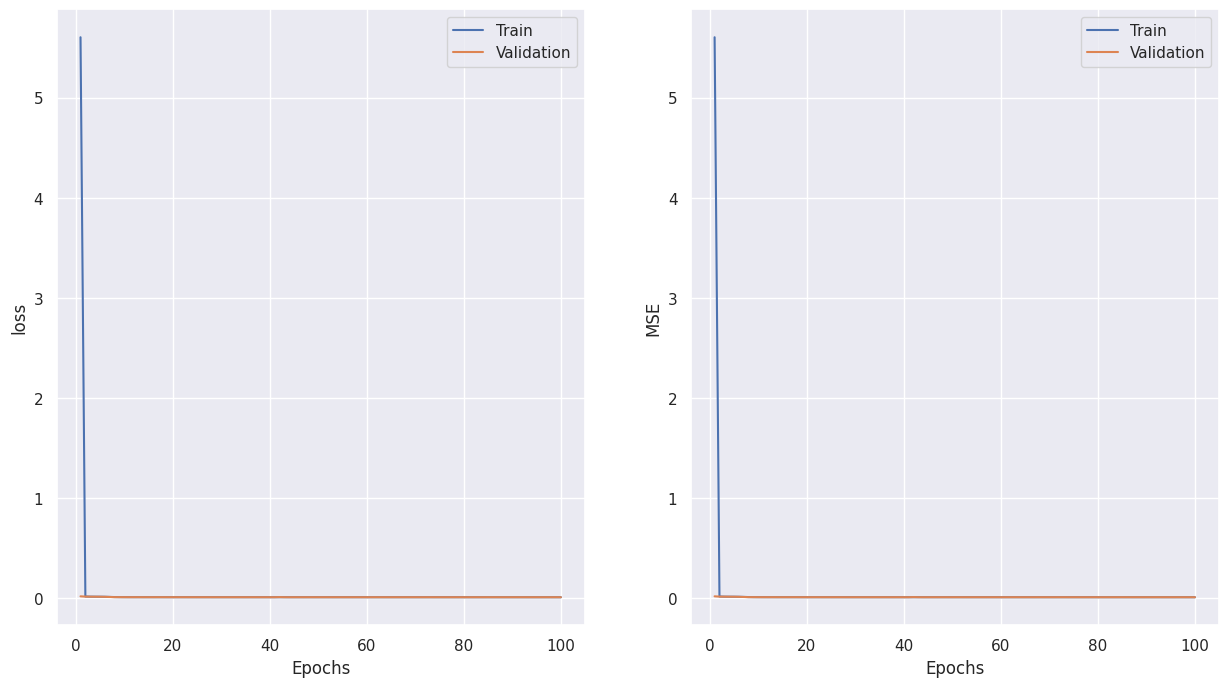

In [ ]:
plot_history_curve(total_epoch=100,start=1)


그래프에서 epoch가 수십번 진행한 후에는 모델의 성능이 거의 향상되지 않는 것을 볼 수 있다. 에포크마다 훈련 상태를 점검하기 위해 EarlyStopping 콜백(callback)을 사용한다. 이 옵션은 지정된 에포크 횟수동안 성능 향상이 없으면 자동으로 훈련이 멈춘다.

In [ ]:
# patience 매개변수는 성능 향상을 체크할 에포크 횟수
from tensorflow import keras
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)

history=model.fit(X_train_reshaped,Y_train,epochs=100,validation_split=0.2,verbose=1,callbacks=[early_stop])


Epoch 1/100
731/731 [==============================] - 25s 23ms/step - loss: 22.5567 - mse: 22.5567 - val_loss: 0.0136 - val_mse: 0.0136
Epoch 2/100
731/731 [==============================] - 15s 21ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 3/100
731/731 [==============================] - 16s 22ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 4/100
731/731 [==============================] - 17s 23ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 5/100
731/731 [==============================] - 17s 24ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 6/100
731/731 [==============================] - 16s 23ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 7/100
731/731 [==============================] - 16s 23ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 8/100
731/731 [==============================] 

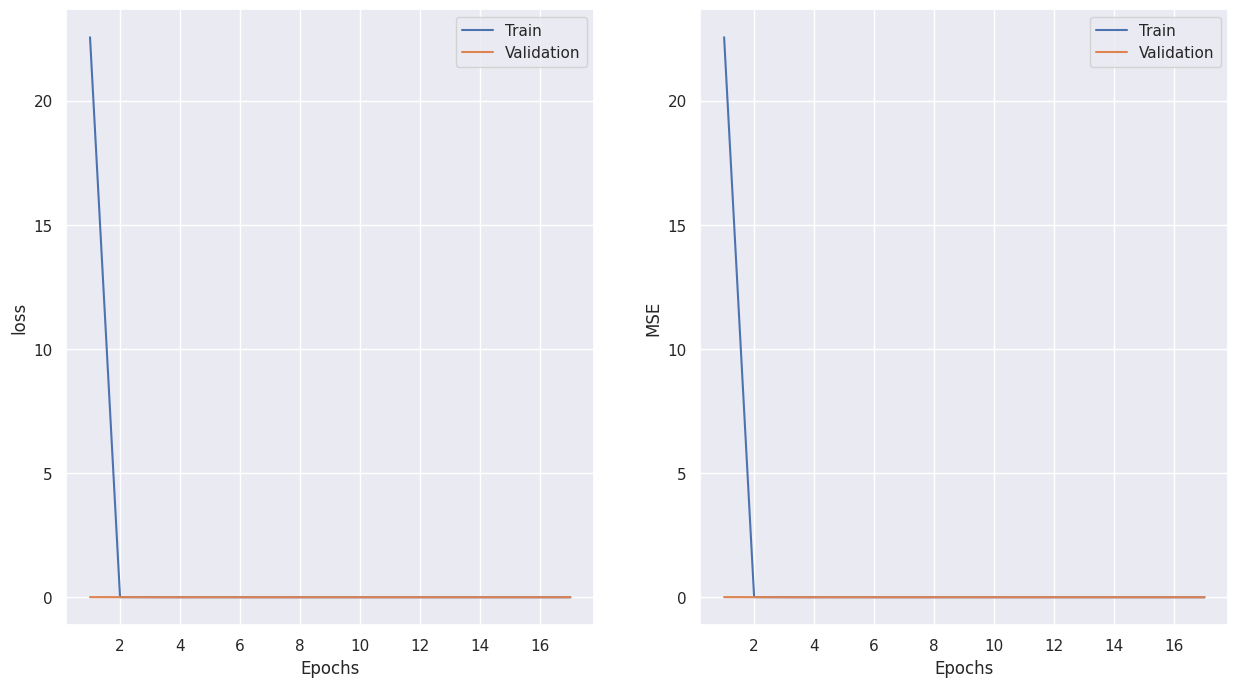

In [ ]:
plot_history_curve(total_epoch=17,start=1)

# 모델 평가

In [ ]:
res=model.evaluate(X_test_reshaped, Y_test, verbose=1)
print(f'테스트 세트의 MSE : {round(res[1], 4)}')

229/229 [==============================] - 1s 5ms/step - loss: 0.0078 - mse: 0.0078
테스트 세트의 MSE : 0.0078


In [ ]:
# R_square
from sklearn.metrics import r2_score
score = r2_score(Y_test, model.predict(X_test_reshaped))
score

229/229 [==============================] - 1s 5ms/step


0.28855612970163635

229/229 [==============================] - 1s 3ms/step


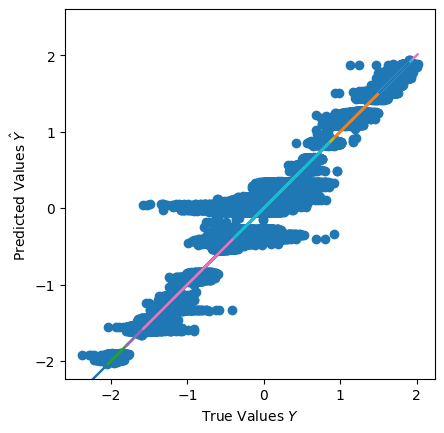

In [ ]:
# plot
import matplotlib.pyplot as plt

plt.scatter(Y_test, model.predict(X_test_reshaped))
plt.xlabel("True Values $Y$")
plt.ylabel("Predicted Values $\hat{Y}$")
plt.axis("equal")
plt.axis("square")
plt.plot(Y_test, Y_test)
plt.show()

# 적용시킬 목소리 파일 입력받기

In [ ]:
wa="/content/gdrive//MyDrive/Wav2Lip/wav/audio_file.wav"

In [ ]:
# WAV 파일 읽기
y, sr = librosa.load(wa)

# MFCCs 추출
n_mfcc = 20  # MFCCs의 차원 수
n_fft = 2048  # FFT 크기
hop_length = 512  # 프레임 이동 간격

# MFCCs 추출
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

# 원하는 행의 개수를 지정
num_rows = 329
# MFCCs 데이터를 2차원 행렬로 변환
mfcc_matrix_ = np.empty((0, n_mfcc))

# MFCCs 데이터를 행 단위로 추가
for i in range(num_rows):
    start_frame = i * (mfccs.shape[1] // num_rows)
    end_frame = (i + 1) * (mfccs.shape[1] // num_rows)
    mfcc_sequence = mfccs[:, start_frame:end_frame]
    mfcc_matrix_ = np.vstack((mfcc_matrix_, mfcc_sequence.T))  # .T를 통해 전치하여 (n_mfcc, 프레임 수) 형태로

# 결과 확인
print("2D 행렬의 형태:", mfcc_matrix_.shape)

2D 행렬의 형태: (329, 20)


In [ ]:
mfcc_matrix_

array([[-3.89145142e+02,  9.92002411e+01,  2.76201859e+01, ...,
         4.91820574e+00,  7.26293278e+00,  1.33049905e+00],
       [-2.76436981e+02,  6.17430573e+01,  1.96106129e+01, ...,
         2.01745758e+01,  4.54727173e+00,  8.67536783e-01],
       [-1.93924576e+02,  4.58624725e+01,  1.37431660e+01, ...,
         2.15107250e+01,  6.24473453e-01, -3.28706980e+00],
       ...,
       [-2.04391617e+02,  1.11690598e+02, -1.71410294e+01, ...,
         1.22319403e+01, -7.06464481e+00, -1.35376811e+00],
       [-1.88997131e+02,  1.46041946e+02, -2.72662210e+00, ...,
         4.08183479e+00, -8.46849680e-01,  1.72464252e-02],
       [-1.35380219e+02,  1.44040054e+02, -8.58210564e+00, ...,
         4.54561234e+00, -2.09507537e+00,  1.15694189e+00]])

In [ ]:
y=model(mfcc_matrix_)             # 예측된 표준화 좌표

In [ ]:
y

<tf.Tensor: shape=(329, 40), dtype=float32, numpy=
array([[-1.9588535 , -1.219673  , -0.5033467 , ...,  0.1194309 ,
         0.28040504,  0.23261008],
       [-2.0151355 , -1.2510682 , -0.5280951 , ...,  0.14859791,
         0.35406372,  0.30300468],
       [-2.0177135 , -1.2558832 , -0.523826  , ...,  0.15972678,
         0.3604304 ,  0.3072246 ],
       ...,
       [-1.9837039 , -1.2276936 , -0.51248914, ...,  0.13453455,
         0.33091655,  0.2936641 ],
       [-1.9892266 , -1.2328713 , -0.5183383 , ...,  0.13007206,
         0.32270828,  0.27839684],
       [-1.9834273 , -1.227984  , -0.51902807, ...,  0.12357557,
         0.31760716,  0.27532226]], dtype=float32)>

# 적용할 동영상 프레임 단위로 랜드마크 데이터프레임화

In [ ]:
df = pd.read_csv("/content/gdrive//MyDrive/Wav2Lip/csv/KakaoTalk_20231119_220036247.csv",index_col=0)    # 딥페이크 영상 프레임 단위로 랜드마크 저장

In [ ]:
# 그 중 기준이 되는 프레임1
d=df.iloc[319,:]

In [ ]:
# x 좌표와 y 좌표 구분
x_cols = d[:20]  # x 열
y_cols = d[20:]  # y 열

import numpy as np
mx=np.mean(x_cols)
my=np.mean(y_cols)
sx=np.std(x_cols)
sy=np.std(y_cols)


In [ ]:
y=np.copy(y)
y_df = pd.DataFrame(y, columns=df3.columns)

In [ ]:
# 기준 프레임에 역표준화하여 적용시킴
y_df.iloc[:, :20]=(y_df.iloc[:, :20].mul(sx)).add(mx)
y_df.iloc[:, 20:]=(y_df.iloc[:, 20:].mul(sy)).add(my)

In [ ]:
y_df

,Landmark_1_X,Landmark_2_X,Landmark_3_X,Landmark_4_X,Landmark_5_X,Landmark_6_X,Landmark_7_X,Landmark_8_X,Landmark_9_X,Landmark_10_X,...,Landmark_11_Y,Landmark_12_Y,Landmark_13_Y,Landmark_14_Y,Landmark_15_Y,Landmark_16_Y,Landmark_17_Y,Landmark_18_Y,Landmark_19_Y,Landmark_20_Y
0,610.283508,621.761292,632.884216,640.581848,648.343933,659.051208,668.801758,659.906189,650.205933,641.899719,...,308.437622,302.822388,289.617523,285.055908,285.601013,283.890045,286.112213,290.374756,292.227692,291.677551
1,609.409546,621.273804,632.499878,640.566040,648.535950,659.192505,668.500610,660.436096,650.920471,642.177063,...,309.233521,303.600311,290.216400,285.401459,285.760101,283.646149,284.102081,290.710480,293.075592,292.487854
2,609.369507,621.199036,632.566162,640.684326,648.460999,659.223328,668.592346,660.432373,651.100769,642.158447,...,309.322327,303.610413,290.103088,285.410645,285.664948,283.755920,283.856293,290.838593,293.148865,292.536407
3,609.906738,621.519897,632.727295,640.646729,648.327515,658.964294,668.349487,660.098999,650.847229,642.088013,...,308.913910,303.289612,289.962982,285.395813,285.692566,283.840820,284.394409,290.729156,292.901794,292.327271
4,609.749146,621.440735,632.648438,640.578003,648.394531,658.992676,668.410034,660.196899,650.778625,642.025146,...,308.905426,303.313843,290.014465,285.349060,285.719727,283.752228,284.595642,290.670898,292.837250,292.223450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,611.022461,621.915833,633.452698,640.907898,648.139343,659.169189,669.763000,659.402527,649.404053,641.106445,...,307.369171,301.561066,288.453735,284.328735,285.015686,284.435028,289.217896,290.145538,290.840546,290.015533
325,610.946350,621.848877,633.436768,640.937134,648.150940,659.192078,669.764160,659.443054,649.471008,641.089905,...,307.413727,301.587860,288.464264,284.337708,284.995544,284.443848,289.095184,290.194061,290.881927,290.025818
326,609.897644,621.636719,632.742249,640.519226,648.278137,659.000671,668.662781,660.109985,650.703186,642.176514,...,308.970886,303.364960,289.890320,285.320160,285.745758,283.758514,284.791077,290.548615,292.809143,292.380341
327,609.811890,621.556335,632.651428,640.495605,648.436218,659.088989,668.625122,660.195801,650.563171,642.110474,...,308.897095,303.311646,289.992737,285.266663,285.754578,283.693634,285.020538,290.497253,292.714661,292.204590


In [ ]:
# 기준이 되는 프레임 내 x,y 좌표 min값 빼줌
y_df.iloc[:, :20]=y_df.iloc[:, :20].sub(y_df.iloc[:, :20].min(axis=1), axis=0)
y_df.iloc[:, 20:]=y_df.iloc[:, 20:].sub(y_df.iloc[:, 20:].min(axis=1), axis=0)

In [ ]:
y_df

,Landmark_1_X,Landmark_2_X,Landmark_3_X,Landmark_4_X,Landmark_5_X,Landmark_6_X,Landmark_7_X,Landmark_8_X,Landmark_9_X,Landmark_10_X,...,Landmark_11_Y,Landmark_12_Y,Landmark_13_Y,Landmark_14_Y,Landmark_15_Y,Landmark_16_Y,Landmark_17_Y,Landmark_18_Y,Landmark_19_Y,Landmark_20_Y
0,0.0,11.477783,22.600708,30.298340,38.060425,48.767700,58.518250,49.622681,39.922424,31.616211,...,37.232727,31.617493,18.412628,13.851013,14.396118,12.685150,14.907318,19.169861,21.022797,20.472656
1,0.0,11.864258,23.090332,31.156494,39.126404,49.782959,59.091064,51.026550,41.510925,32.767517,...,38.294037,32.660828,19.276917,14.461975,14.820618,12.706665,13.162598,19.770996,22.136108,21.548370
2,0.0,11.829529,23.196655,31.314819,39.091492,49.853821,59.222839,51.062866,41.731262,32.788940,...,38.576111,32.864197,19.356873,14.664429,14.918732,13.009705,13.110077,20.092377,22.402649,21.790192
3,0.0,11.613159,22.820557,30.739990,38.420776,49.057556,58.442749,50.192261,40.940491,32.181274,...,37.887909,32.263611,18.936981,14.369812,14.666565,12.814819,13.368408,19.703156,21.875793,21.301270
4,0.0,11.691589,22.899292,30.828857,38.645386,49.243530,58.660889,50.447754,41.029480,32.276001,...,37.858765,32.267181,18.967804,14.302399,14.673065,12.705566,13.548981,19.624237,21.790588,21.176788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.0,10.893372,22.430237,29.885437,37.116882,48.146729,58.740540,48.380066,38.381592,30.083984,...,36.741821,30.933716,17.826385,13.701385,14.388336,13.807678,18.590546,19.518188,20.213196,19.388184
325,0.0,10.902527,22.490417,29.990784,37.204590,48.245728,58.817810,48.496704,38.524658,30.143555,...,36.787354,30.961487,17.837891,13.711334,14.369171,13.817474,18.468811,19.567688,20.255554,19.399445
326,0.0,11.739075,22.844604,30.621582,38.380493,49.103027,58.765137,50.212341,40.805542,32.278870,...,37.855835,32.249908,18.775269,14.205109,14.630707,12.643463,13.676025,19.433563,21.694092,21.265289
327,0.0,11.744446,22.839539,30.683716,38.624329,49.277100,58.813232,50.383911,40.751282,32.298584,...,37.743164,32.157715,18.838806,14.112732,14.600647,12.539703,13.866608,19.343323,21.560730,21.050659


In [ ]:
# 적용하려는 동영상 프레임 당 x,y좌표 min값 더해줌(x,y min값 기준으로 재조정)
y_df.iloc[:, :20]=y_df.iloc[:, :20].add(df.iloc[:, :20].min(axis=1), axis=0)
y_df.iloc[:, 20:]=y_df.iloc[:, 20:].add(df.iloc[:, 20:].min(axis=1), axis=0)

In [ ]:
y_df

,Landmark_1_X,Landmark_2_X,Landmark_3_X,Landmark_4_X,Landmark_5_X,Landmark_6_X,Landmark_7_X,Landmark_8_X,Landmark_9_X,Landmark_10_X,...,Landmark_11_Y,Landmark_12_Y,Landmark_13_Y,Landmark_14_Y,Landmark_15_Y,Landmark_16_Y,Landmark_17_Y,Landmark_18_Y,Landmark_19_Y,Landmark_20_Y
0,613.0,624.477783,635.600708,643.298340,651.060425,661.767700,671.518250,662.622681,652.922424,644.616211,...,314.232727,308.617493,295.412628,290.851013,291.396118,289.685150,291.907318,296.169861,298.022797,297.472656
1,613.0,624.864258,636.090332,644.156494,652.126404,662.782959,672.091064,664.026550,654.510925,645.767517,...,315.294037,309.660828,296.276917,291.461975,291.820618,289.706665,290.162598,296.770996,299.136108,298.548370
2,613.0,624.829529,636.196655,644.314819,652.091492,662.853821,672.222839,664.062866,654.731262,645.788940,...,316.576111,310.864197,297.356873,292.664429,292.918732,291.009705,291.110077,298.092377,300.402649,299.790192
3,612.0,623.613159,634.820557,642.739990,650.420776,661.057556,670.442749,662.192261,652.940491,644.181274,...,315.887909,310.263611,296.936981,292.369812,292.666565,290.814819,291.368408,297.703156,299.875793,299.301270
4,613.0,624.691589,635.899292,643.828857,651.645386,662.243530,671.660889,663.447754,654.029480,645.276001,...,314.858765,309.267181,295.967804,291.302399,291.673065,289.705566,290.548981,296.624237,298.790588,298.176788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,614.0,624.893372,636.430237,643.885437,651.116882,662.146729,672.740540,662.380066,652.381592,644.083984,...,316.741821,310.933716,297.826385,293.701385,294.388336,293.807678,298.590546,299.518188,300.213196,299.388184
325,614.0,624.902527,636.490417,643.990784,651.204590,662.245728,672.817810,662.496704,652.524658,644.143555,...,321.787354,315.961487,302.837891,298.711334,299.369171,298.817474,303.468811,304.567688,305.255554,304.399445
326,614.0,625.739075,636.844604,644.621582,652.380493,663.103027,672.765137,664.212341,654.805542,646.278870,...,325.855835,320.249908,306.775269,302.205109,302.630707,300.643463,301.676025,307.433563,309.694092,309.265289
327,614.0,625.744446,636.839539,644.683716,652.624329,663.277100,672.813232,664.383911,654.751282,646.298584,...,329.743164,324.157715,310.838806,306.112732,306.600647,304.539703,305.866608,311.343323,313.560730,313.050659


# 동영상 만들기

In [ ]:
import cv2
import os
# 각 이미지에 대해 랜드마크 좌표 읽어서 이미지 변형 및 저장
for i in range(len(y_df)):
    x_coords = y_df.iloc[i, :20].values
    y_coords = y_df.iloc[i, 20:].values
    landmarks = np.array(pd.DataFrame([x_coords, y_coords]).T)

    # 입술 부분의 좌표 추출
    lip_points = np.array(landmarks, dtype=np.int32)

    x_coords_in = y_df.iloc[i, 12:20].values
    y_coords_in = y_df.iloc[i, 32:].values
    landmarks_in = np.array(pd.DataFrame([x_coords_in, y_coords_in]).T)

    # 입안 부분의 좌표 추출
    mouth_inner_points = np.array(landmarks_in, dtype=np.int32)

    # 이미지 복사
    # 이미지 로드 (실제 이미지 파일 경로로 대체)
    frame_num=i
    image_path = f"/content/gdrive//MyDrive/Wav2Lip/original_frame/frame_{i}.jpg"
    image = cv2.imread(image_path)
    transformed_image = image.copy()

    # 입술 부분을 빨간색으로 칠하기
    cv2.fillPoly(transformed_image, [lip_points], color=(134, 100, 224))  # 빨간색 (BGR 순서)

    # 입안 부분을 어두운색으로 칠하기
    cv2.fillPoly(transformed_image, [mouth_inner_points], color=(64, 58, 52))  # 어두운색 (BGR 순서)

    # 변형된 이미지 저장
    output_dir="/content/gdrive//MyDrive/Wav2Lip/output_image"
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, f"output_{i}.jpg")
    cv2.imwrite(output_path, transformed_image)


In [ ]:
import cv2
import imageio
import os

# 사진들이 있는 디렉토리 경로
photo_directory = "/content/gdrive//MyDrive/Wav2Lip/output_image/"

# 사진 파일들의 리스트 생성
photo_files = [os.path.join(photo_directory, f) for f in os.listdir(photo_directory) if f.endswith('.jpg')]

# 동영상 파일 경로
video_path = "/content/gdrive//MyDrive/Wav2Lip/mp4/video_new.mp4"

# 동영상 프레임의 크기 설정
frame_size = (1920, 1080)

# 원하는 동영상 길이 설정 (초)
desired_duration = 14

# 초당 프레임 수 계산
frame_rate = len(photo_files) / desired_duration

# VideoWriter 객체 생성
video_writer = cv2.VideoWriter(video_path, cv2.VideoWriter_fourcc(*'mp4v'), frame_rate, frame_size)

# 사진들을 동영상에 추가
for photo in photo_files:
    img = cv2.imread(photo)
    img = cv2.resize(img, frame_size)
    video_writer.write(img)

# 사용이 끝난 객체들을 해제
video_writer.release()


# 영상에 소리 입히기

In [ ]:
!pip uninstall moviepy decorator
!pip install moviepy

Found existing installation: moviepy 1.0.3
Uninstalling moviepy-1.0.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/moviepy-1.0.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/moviepy/*
Proceed (Y/n)? Y
  Successfully uninstalled moviepy-1.0.3
Found existing installation: decorator 4.4.2
Uninstalling decorator-4.4.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/decorator-4.4.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/decorator.py
Proceed (Y/n)? Y
  Successfully uninstalled decorator-4.4.2
  Using cached moviepy-1.0.3-py3-none-any.whl
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipyth

In [ ]:
from moviepy.editor import VideoFileClip, AudioFileClip

# 동영상 파일 경로
video_path = "/content/gdrive//MyDrive/Wav2Lip/mp4/video_new.mp4"

# 소리 파일 경로
audio_path = "/content/gdrive//MyDrive/Wav2Lip/wav/audio_file.wav"

# 출력 동영상 파일 경로
output_path = "/content/gdrive//MyDrive/Wav2Lip/mp4/video_final_new.mp4"

# 동영상 클립 로드
video_clip = VideoFileClip(video_path)

# 소리 클립 로드
audio_clip = AudioFileClip(audio_path)

# 소리를 동영상에 추가
video_clip = video_clip.set_audio(audio_clip)

# 결과를 파일로 저장
video_clip.write_videofile(output_path, codec="libx264", audio_codec="aac")


# 사용이 끝난 객체 해제
video_clip.close()
audio_clip.close()


Moviepy - Building video /content/gdrive//MyDrive/Wav2Lip/mp4/video_final_new.mp4.
MoviePy - Writing audio in video_final_newTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video /content/gdrive//MyDrive/Wav2Lip/mp4/video_final_new.mp4



Moviepy - Done !
Moviepy - video ready /content/gdrive//MyDrive/Wav2Lip/mp4/video_final_new.mp4
